In [ ]:
#Source: https://medium.com/towards-data-science/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe
#self.X has the data and self.dtype = tf.float32

In [5]:
import tensorflow as tf
import numpy as np

class TF_PCA:
    def __init__(self,data,target):
        self.data = data
        self.dtype = data.dtype
        self.target = target
        
    def fit(self):
        self.graph = tf.Graph()
        with self.graph.as_default():
            self.X = tf.placeholder(self.dtype,shape=self.data.shape)

            #Perform SVD
            singular_values, u, _ = tf.svd(self.X)

            #Create sigma matrix
            sigma = tf.diag(singular_values)

        with tf.Session(graph=self.graph) as session:
            self.u, self.singular_values,self.sigma = session.run([u,singular_values,sigma],feed_dict={self.X:self.data})

    def reduce(self,n_dimensions=None,keep_info=None):
        if keep_info:
            #Normalized singular values
            normalized_singular_values = self.singular_values/sum(self.singular_values)
            #Create the aggregated ladder of kept information per dimension
            ladder = np.cumsum(normalized_singular_values)

            #Get the first index which is above the given information threshold
            index = next(idx for idx,value in enumerate(ladder) if value>= keep_info)+1
            n_dimensions = index

        with self.graph.as_default():
            #Cut out the relevant part from sigma
            sigma = tf.slice(self.sigma,[0,0], [self.data.shape[1],n_dimensions])

            #PCA
            pca = tf.matmul(self.u,sigma)

        with tf.Session(graph=self.graph) as session:
            return session.run(pca,feed_dict={self.X:self.data})

    

In [9]:
#Trying this out on iris dataset

from sklearn.datasets import load_iris as iris_dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tf_pca = TF_PCA(iris_dataset().data,iris_dataset().target)
tf_pca.fit()
pca = tf_pca.reduce(keep_info=0.9) # Results in 2 dimensions


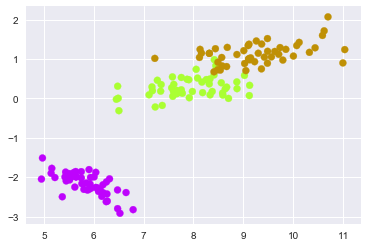

In [10]:

color_mapping = {0: sns.xkcd_rgb['bright purple'],1:sns.xkcd_rgb['lime'],2:sns.xkcd_rgb['ochre']}
colors = list(map(lambda x: color_mapping[x],tf_pca.target))

plt.scatter(pca[:, 0], pca[:, 1], c=colors)